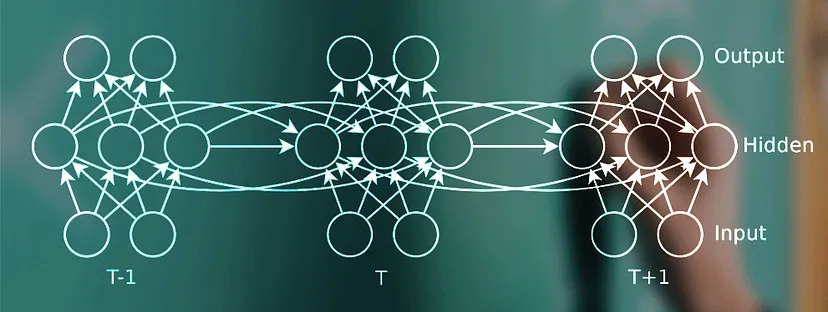

In [2]:
import pandas as pd

In [3]:
tsla=pd.read_csv("/content/drive/MyDrive/Stocks/TSLA.csv")

In [4]:
tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [5]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [6]:
df1=tsla.reset_index()['Close']

In [7]:
df1.shape

(1259,)

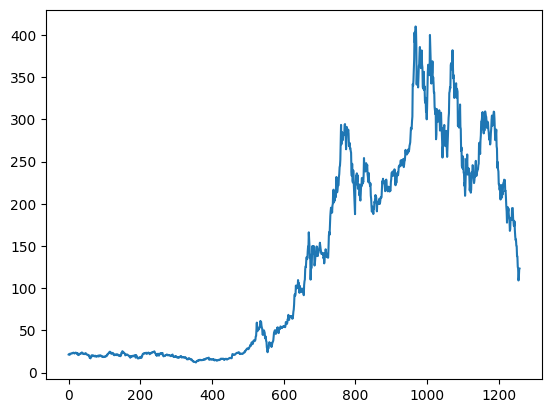

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

scaling the data

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [10]:
df1.shape

(1259, 1)

In [11]:
len(df1)

1259

**Train Test Split**

In [12]:
df1

array([[0.02370959],
       [0.02316023],
       [0.02271974],
       ...,
       [0.25318813],
       [0.27607536],
       [0.27949211]])

In [13]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size


In [14]:
training_size

944

In [15]:
test_size

315

In [16]:
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
len(train_data)

944

In [18]:
len(test_data)

315

In [19]:
def df2(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[ i + time_step,0])
  return np.array(dataX),np.array(dataY)

In [20]:
time_step=100
X_train,y_train=df2(train_data,time_step)
X_test,y_test=df2(test_data,time_step)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(844, 100)
(844,)
(215, 100)
(215,)


The LSTM input layer must be 3D.where thw three input dimensions are: samples, time steps, and features.

In [22]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

**MODELLING**

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow .keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(75,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(75,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(75))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 75)           23100     
                                                                 
 lstm_1 (LSTM)               (None, 100, 75)           45300     
                                                                 
 lstm_2 (LSTM)               (None, 75)                45300     
                                                                 
 dense (Dense)               (None, 1)                 76        
                                                                 
Total params: 113,776
Trainable params: 113,776
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 16s 214ms/step - loss: 0.0225 - val_loss: 0.0191
Epoch 2/100
14/14 [==============================] - 1s 36ms/step - loss: 0.0030 - val_loss: 0.0094
Epoch 3/100
14/14 [==============================] - 1s 45ms/step - loss: 0.0014 - val_loss: 0.0061
Epoch 4/100
14/14 [==============================] - 1s 48ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 5/100
14/14 [==============================] - 1s 41ms/step - loss: 9.2779e-04 - val_loss: 0.0057
Epoch 6/100
14/14 [==============================] - 1s 41ms/step - loss: 8.9319e-04 - val_loss: 0.0059
Epoch 7/100
14/14 [==============================] - 1s 39ms/step - loss: 8.9206e-04 - val_loss: 0.0063
Epoch 8/100
14/14 [==============================] - 1s 48ms/step - loss: 9.7079e-04 - val_loss: 0.0064
Epoch 9/100
14/14 [==============================] - 1s 44ms/step - loss: 9.0511e-04 - val_loss: 0.0059
Epoch 10/100
14/14 [==============================] - 1s 57ms/step - loss: 9.4

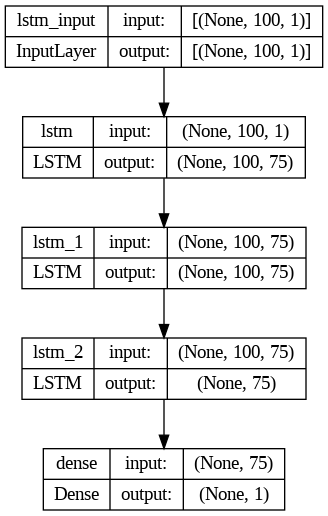

In [28]:

tf.keras.utils.plot_model(model, show_shapes=True)

 prediction and check performance metrics

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 0s 7ms/step


In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

**RMSE performance metrics**

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

130.57136777626576

In [33]:
math.sqrt(mean_squared_error(y_test,test_predict))

259.7137024909956